In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('../instacart_2017_05_01/products.csv')
order_products_smol = pd.read_csv('../instacart_2017_05_01/order_products__train.csv')
aisles = pd.read_csv('../instacart_2017_05_01/aisles.csv')

products = products[['product_id', 'aisle_id']]
order_products_smol = order_products_smol[['order_id', 'product_id']]

products.set_index('product_id', inplace=True, drop=False)
aisles.set_index('aisle_id', inplace=True, drop=False)
order_ids = order_products_smol['order_id'].unique()
aisle_names = aisles['aisle'].values

In [2]:
orders_by_aisles = pd.DataFrame(columns=aisles['aisle'].values, index=order_ids)

In [3]:
total_orders = len(order_ids)
total_orders

131209

In [4]:

for order_id in order_ids:
    is_order = order_products_smol['order_id'] == order_id
    products_purchased = order_products_smol[is_order]
    aisle_dic = {}
    for product_id in products_purchased['product_id']:
        aisle_id = products.loc[product_id]['aisle_id']
        aisle_name = aisles.loc[aisle_id]['aisle']
        
        if aisle_name in aisle_dic:
            aisle_dic[aisle_name] += 1
        else:
            aisle_dic[aisle_name] = 1

  
    
    for aisle_key in aisle_dic:
        orders_by_aisles.loc[order_id][aisle_key] = aisle_dic[aisle_key]
        
    

In [5]:
orders_by_aisles = orders_by_aisles.fillna(0)

In [6]:
average_order = {}
for aisle_name in aisle_names:
    average_order[aisle_name] = orders_by_aisles[aisle_name].mean()
average_order

{'prepared soups salads': 0.022376513806217562,
 'specialty cheeses': 0.029517792224618738,
 'energy granola bars': 0.13298630429315061,
 'instant foods': 0.07558170552324917,
 'marinades meat preparation': 0.02214024952556608,
 'other': 0.013680463992561486,
 'packaged meat': 0.011630299750779291,
 'bakery desserts': 0.011439764040576485,
 'pasta sauce': 0.07420222698138085,
 'kitchen supplies': 0.003414399926834287,
 'cold flu allergy': 0.010258442637319086,
 'fresh pasta': 0.01240768544840674,
 'prepared meals': 0.03149936361072792,
 'tofu meat alternatives': 0.03904457773475905,
 'packaged seafood': 0.0069278784229740336,
 'fresh herbs': 0.12233916880701781,
 'baking ingredients': 0.09974925500537311,
 'bulk dried fruits vegetables': 0.0055255355958813805,
 'oils vinegars': 0.08093956969415207,
 'oral hygiene': 0.0233977852129046,
 'packaged cheese': 0.31780594318987265,
 'hair care': 0.011195878331516893,
 'popcorn jerky': 0.052717420298912424,
 'fresh fruits': 1.1468191968538743,

In [7]:
def profile_by_aisle(aisle):
    is_aisle = orders_by_aisles[aisle] > 0
    aisle_orders = orders_by_aisles[is_aisle]
    
    typical_order_by_profile = {}
    for aisle_name in aisle_names:
        typical_order_by_profile[aisle_name] = aisle_orders[aisle_name].mean()
    
    return typical_order_by_profile
    
    

In [8]:
def compare(profile):
    relative_purchases = {}
    for aisle in profile:
        relative_purchases[aisle] = profile[aisle] / average_order[aisle]
        
    return relative_purchases

In [9]:
def sorter(comparison):
    return sorted(comparison, key=comparison.get)

In [10]:
aisle_names

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [11]:
yogurt_compare = compare(profile_by_aisle('yogurt'))

In [12]:
sorter(yogurt_compare)

['spirits',
 'beers coolers',
 'specialty wines champagnes',
 'red wines',
 'white wines',
 'packaged produce',
 'cold flu allergy',
 'muscles joints pain relief',
 'first aid',
 'more household',
 'eye ear care',
 'kitchen supplies',
 'feminine care',
 'air fresheners candles',
 'mint gum',
 'baking supplies decor',
 'cocoa drink mixes',
 'plates bowls cups flatware',
 'facial care',
 'soft drinks',
 'bakery desserts',
 'shave needs',
 'cat food care',
 'cleaning products',
 'trash bags liners',
 'beauty',
 'dog food care',
 'body lotions soap',
 'laundry',
 'food storage',
 'deodorants',
 'paper goods',
 'hair care',
 'energy sports drinks',
 'frozen dessert',
 'water seltzer sparkling water',
 'spices seasonings',
 'ice cream toppings',
 'trail mix snack mix',
 'kosher foods',
 'candy chocolate',
 'skin care',
 'oils vinegars',
 'baking ingredients',
 'oral hygiene',
 'condiments',
 'marinades meat preparation',
 'other',
 'tea',
 'canned meat seafood',
 'vitamins supplements',
 'sa

In [13]:
yogurt_compare['beers coolers']

0.4227362928044821

In [14]:
from numpy import arange
def plot_comparison(profile_name, select_aisles, aisle_lists):
    plot_list = []
    tick_titles = []
    for aisle in select_aisles:
        plot_list.append(aisle_lists[aisle])
        tick_titles.append(aisle.capitalize())
    fig, ax = plt.subplots(figsize=(20, 20))
    plt.xlabel('Aisles', fontsize=30, labelpad=50)
    plt.ylabel('Relative aisle purchases compared to average order', fontsize=30, labelpad=50)
    ax.set_title(profile_name, fontsize=50, color='#424242', loc='left')
    ax.xaxis.label.set_color('#424242')
    ax.yaxis.label.set_color('#424242')
    ax.tick_params(colors='#616161')
    plt.xticks(fontsize=30, rotation=45)
    plt.yticks(fontsize=30)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    plt.tick_params(bottom="off", top="off", left="off", right="off")
    colors = ['#e57373', '#ba68c8', '#64b5f6', '#4db6ac', '#81c784', '#fff176', '#ffb74d', '#90a4ae', '#a1887f']
    
    ax.set_xticks(range(2,(2*len(select_aisles)) + 2,2))
    bar_positions = (arange(len(select_aisles))  + 1)*2
    ax.set_xticklabels(tick_titles)
    
    ax.bar(bar_positions, plot_list, 1.5, color='#4285f4')
    ax.set_facecolor('#f5f5f5')
    fig.patch.set_facecolor('#f5f5f5')
    plt.show()



In [15]:
yogurt_isles = ['beers coolers', 'granola', 'baby food formula', 'fruit vegetable snacks', 'muscles joints pain relief', 'soft drinks']

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


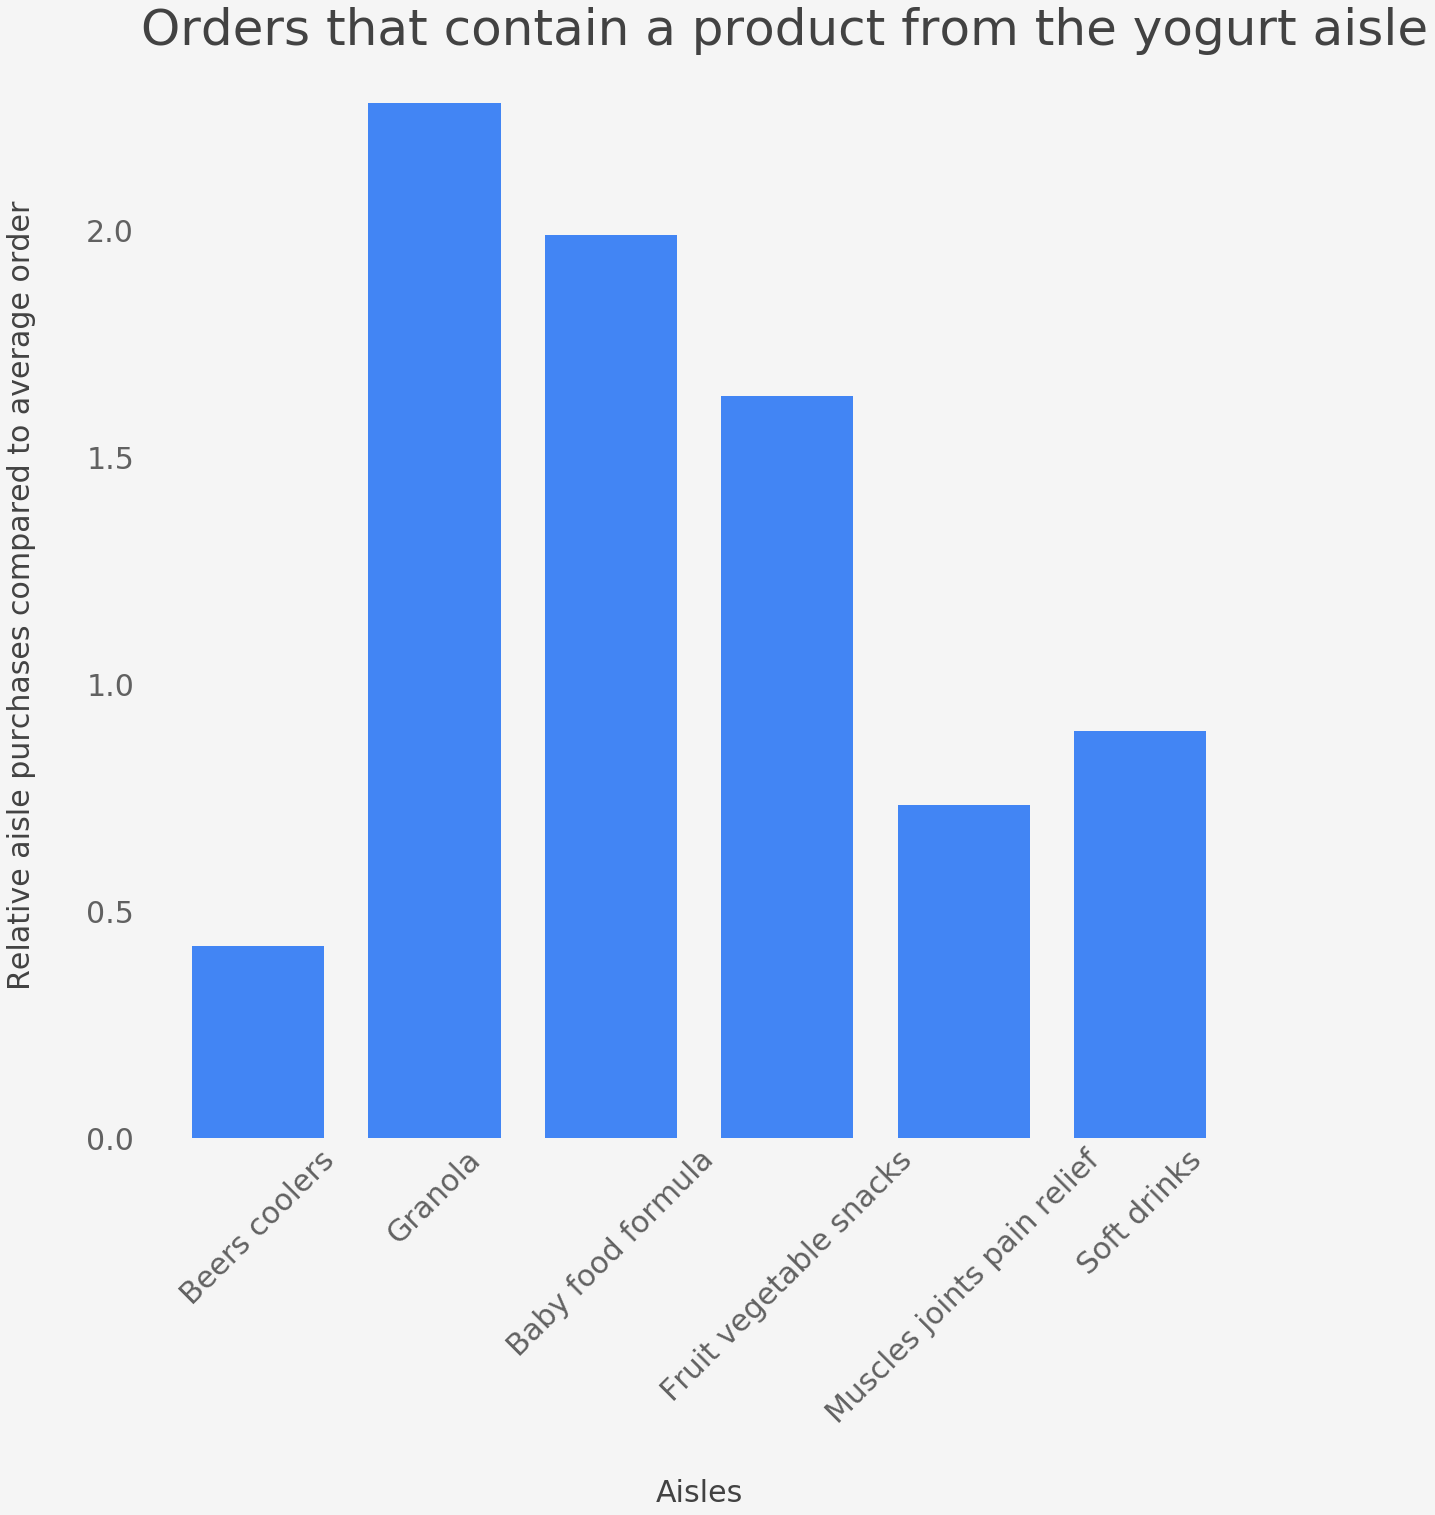

In [16]:
plot_comparison('Orders that contain a product from the yogurt aisle', yogurt_isles, yogurt_compare)

In [17]:
beers_compare = compare(profile_by_aisle('beers coolers'))

In [18]:
sorter(beers_compare)

['bulk grains rice dried goods',
 'beauty',
 'seafood counter',
 'tofu meat alternatives',
 'bulk dried fruits vegetables',
 'digestion',
 'packaged produce',
 'refrigerated pudding desserts',
 'soap',
 'baby accessories',
 'soy lactosefree',
 'spices seasonings',
 'frozen juice',
 'baby food formula',
 'fresh vegetables',
 'fresh fruits',
 'skin care',
 'ice cream toppings',
 'vitamins supplements',
 'packaged vegetables fruits',
 'frozen produce',
 'fruit vegetable snacks',
 'indian foods',
 'poultry counter',
 'grains rice dried goods',
 'meat counter',
 'canned jarred vegetables',
 'granola',
 'hair care',
 'trail mix snack mix',
 'fresh herbs',
 'frozen vegan vegetarian',
 'missing',
 'soup broth bouillon',
 'pasta sauce',
 'baking ingredients',
 'energy granola bars',
 'spreads',
 'diapers wipes',
 'yogurt',
 'packaged seafood',
 'protein meal replacements',
 'packaged poultry',
 'oils vinegars',
 'canned meals beans',
 'frozen breads doughs',
 'dry pasta',
 'prepared meals',
 'f

In [19]:
beers_isles = ['beauty', 'tofu meat alternatives', 'bulk dried fruits vegetables', 'soft drinks', 'frozen pizza']

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


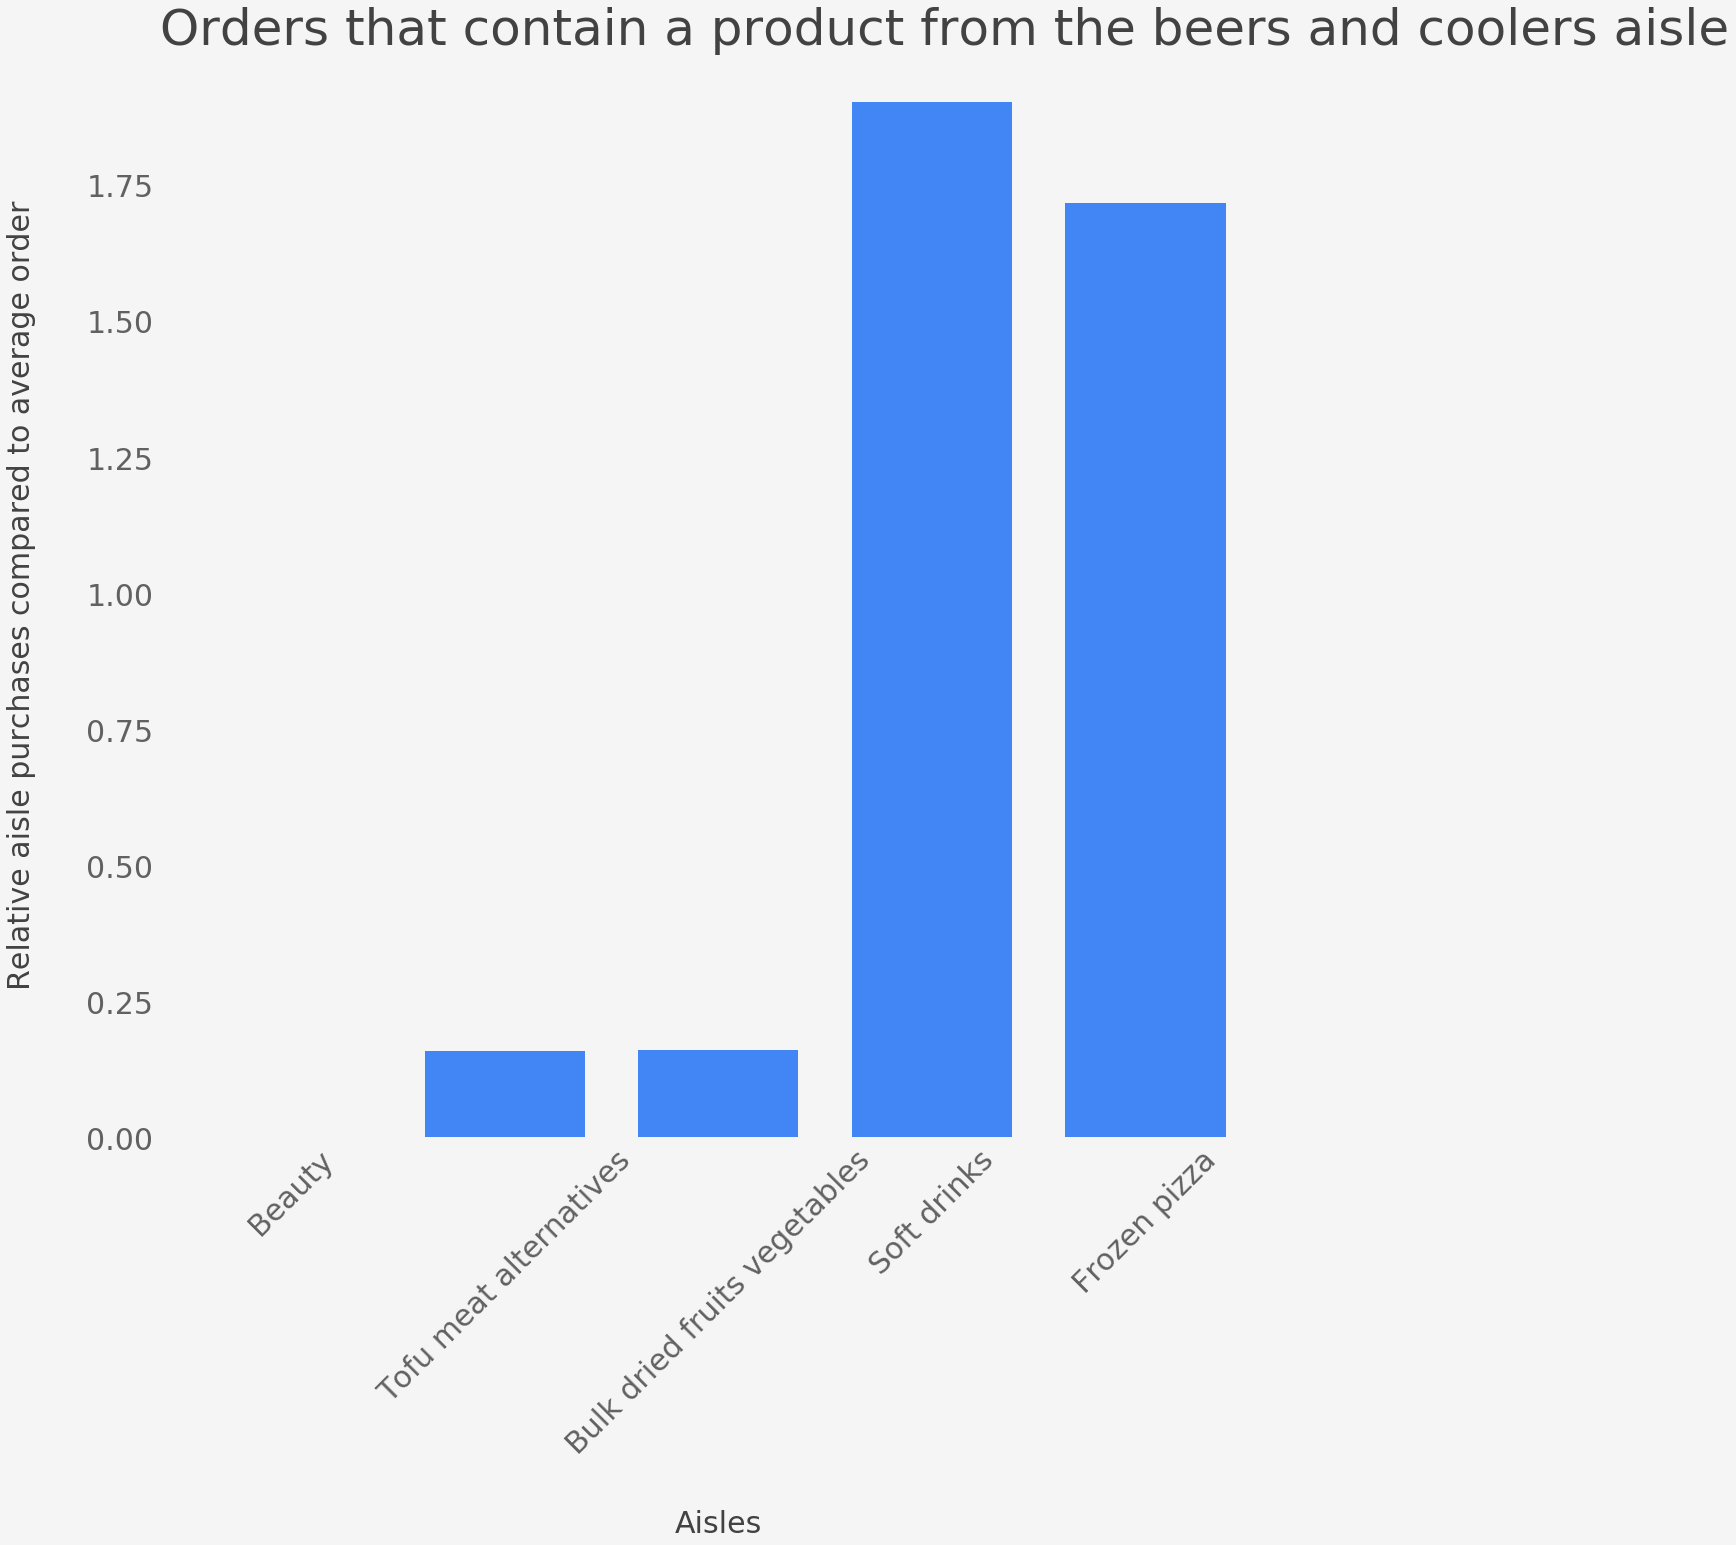

In [20]:
plot_comparison('Orders that contain a product from the beers and coolers aisle', beers_isles, beers_compare)

In [21]:
vegetables_compare = compare(profile_by_aisle('fresh vegetables'))

In [22]:
sorter(vegetables_compare)

['beers coolers',
 'mint gum',
 'specialty wines champagnes',
 'first aid',
 'cold flu allergy',
 'spirits',
 'eye ear care',
 'trail mix snack mix',
 'facial care',
 'energy sports drinks',
 'body lotions soap',
 'plates bowls cups flatware',
 'red wines',
 'feminine care',
 'muscles joints pain relief',
 'white wines',
 'shave needs',
 'soft drinks',
 'cat food care',
 'breakfast bars pastries',
 'cleaning products',
 'air fresheners candles',
 'trash bags liners',
 'diapers wipes',
 'more household',
 'laundry',
 'deodorants',
 'beauty',
 'candy chocolate',
 'cookies cakes',
 'cocoa drink mixes',
 'packaged produce',
 'paper goods',
 'bakery desserts',
 'ice cream toppings',
 'oral hygiene',
 'water seltzer sparkling water',
 'hair care',
 'popcorn jerky',
 'coffee',
 'tea',
 'digestion',
 'frozen meals',
 'baking supplies decor',
 'dog food care',
 'food storage',
 'frozen juice',
 'protein meal replacements',
 'refrigerated pudding desserts',
 'frozen dessert',
 'cereal',
 'energy

In [23]:
vegetables_aisles = ['beers coolers', 'soft drinks', 'cookies cakes', 'fresh herbs', 'seafood counter', 'latino foods']

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


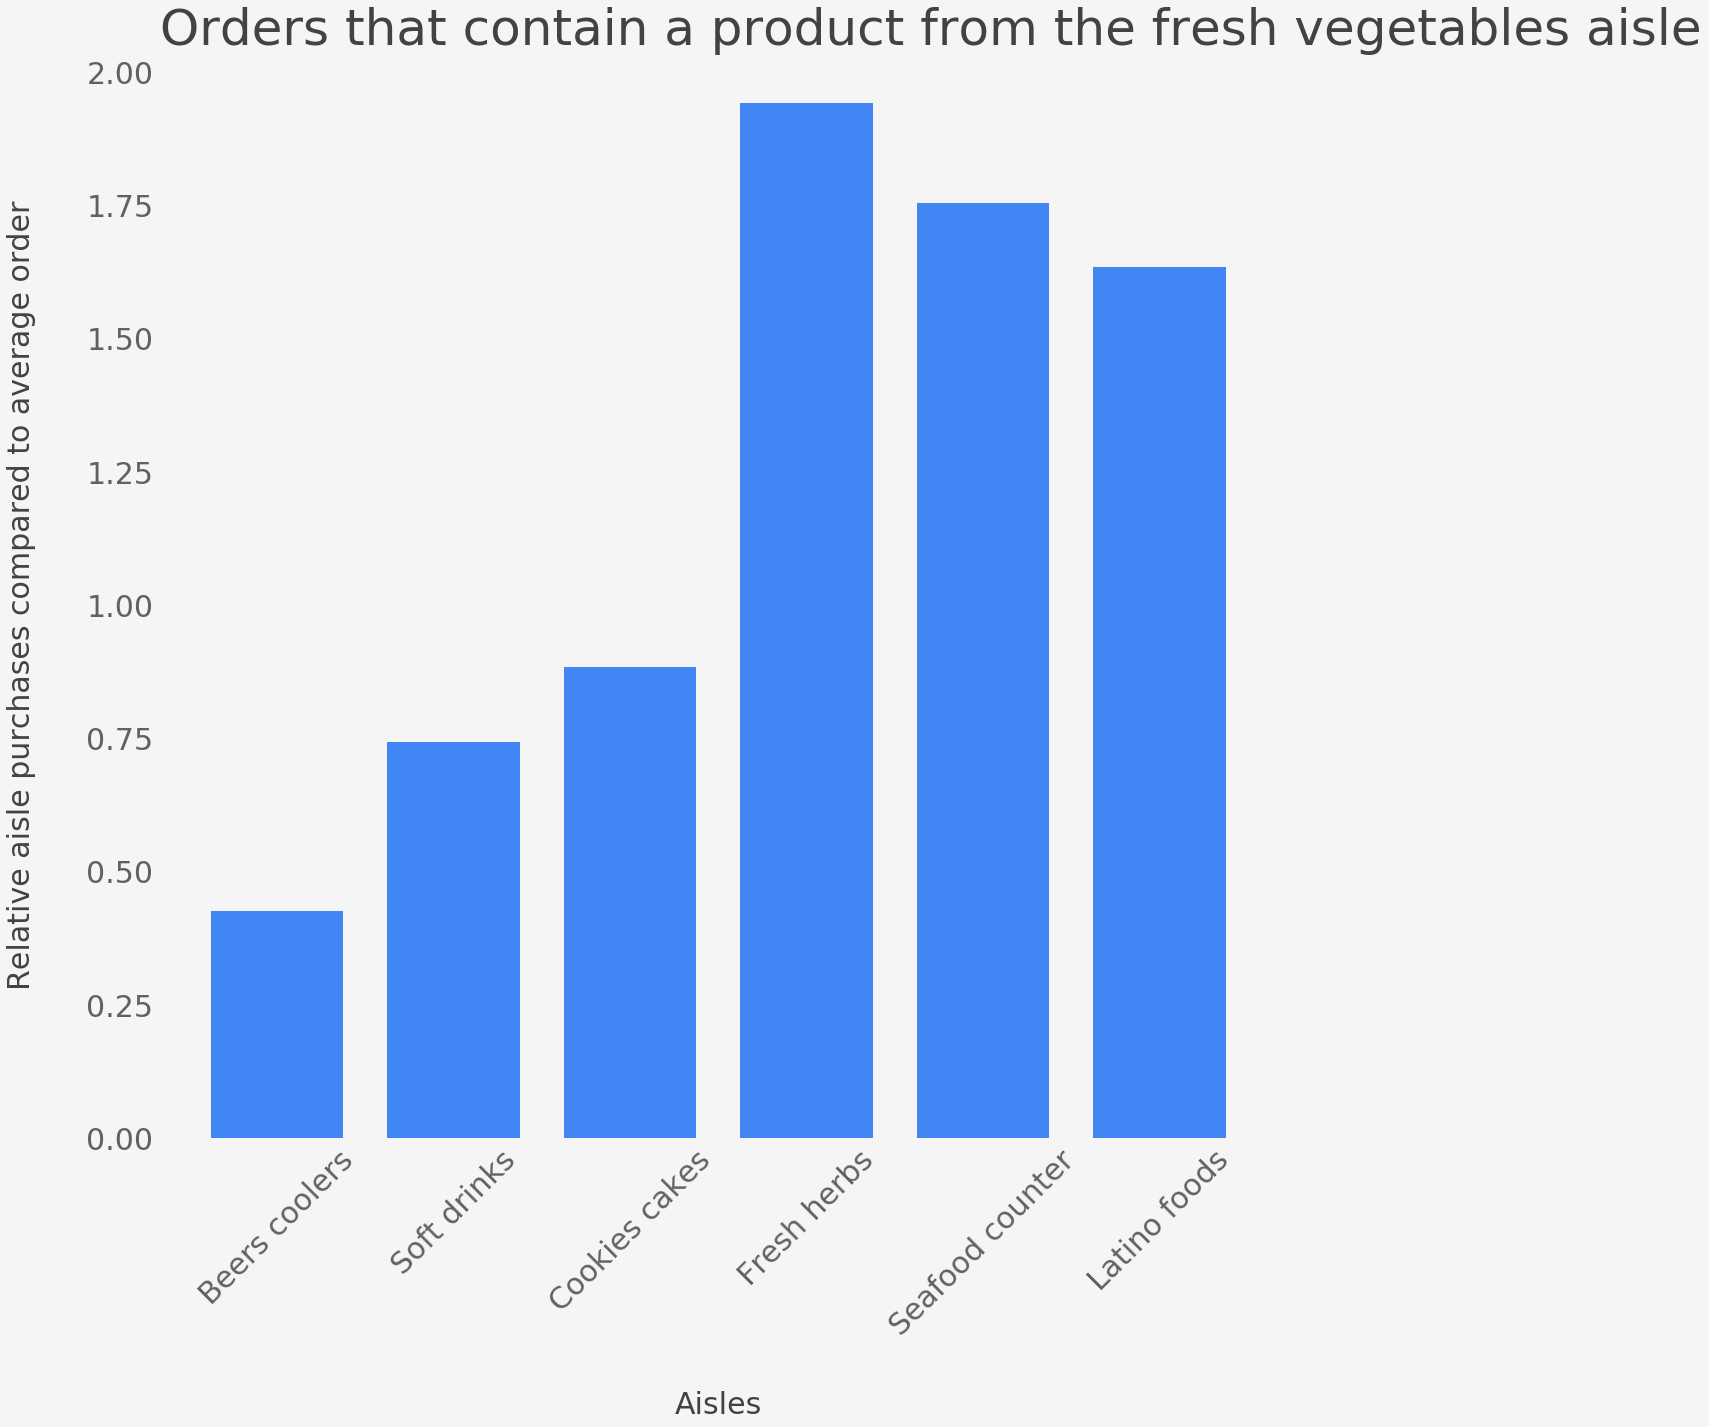

In [24]:
plot_comparison('Orders that contain a product from the fresh vegetables aisle', vegetables_aisles, vegetables_compare)

In [25]:
tofu_compare = compare(profile_by_aisle('tofu meat alternatives'))

In [26]:
sorter(tofu_compare)

['specialty wines champagnes',
 'beers coolers',
 'more household',
 'red wines',
 'white wines',
 'spirits',
 'eye ear care',
 'facial care',
 'body lotions soap',
 'plates bowls cups flatware',
 'mint gum',
 'muscles joints pain relief',
 'first aid',
 'shave needs',
 'packaged produce',
 'cold flu allergy',
 'energy sports drinks',
 'soft drinks',
 'frozen dessert',
 'diapers wipes',
 'cleaning products',
 'air fresheners candles',
 'cocoa drink mixes',
 'baking supplies decor',
 'ice cream toppings',
 'frozen juice',
 'laundry',
 'poultry counter',
 'trash bags liners',
 'feminine care',
 'trail mix snack mix',
 'food storage',
 'lunch meat',
 'packaged poultry',
 'canned fruit applesauce',
 'packaged meat',
 'kosher foods',
 'hot dogs bacon sausage',
 'meat counter',
 'beauty',
 'deodorants',
 'paper goods',
 'breakfast bars pastries',
 'cream',
 'hair care',
 'popcorn jerky',
 'water seltzer sparkling water',
 'cat food care',
 'frozen meat seafood',
 'kitchen supplies',
 'cookie

In [27]:
tofu_compare['poultry counter']

0.7557517518414195

In [28]:
tofu_aisles = ['beers coolers', 'soft drinks', 'frozen vegan vegetarian', 'indian foods', 'asian foods', 'soy lactosefree', 'poultry counter']

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


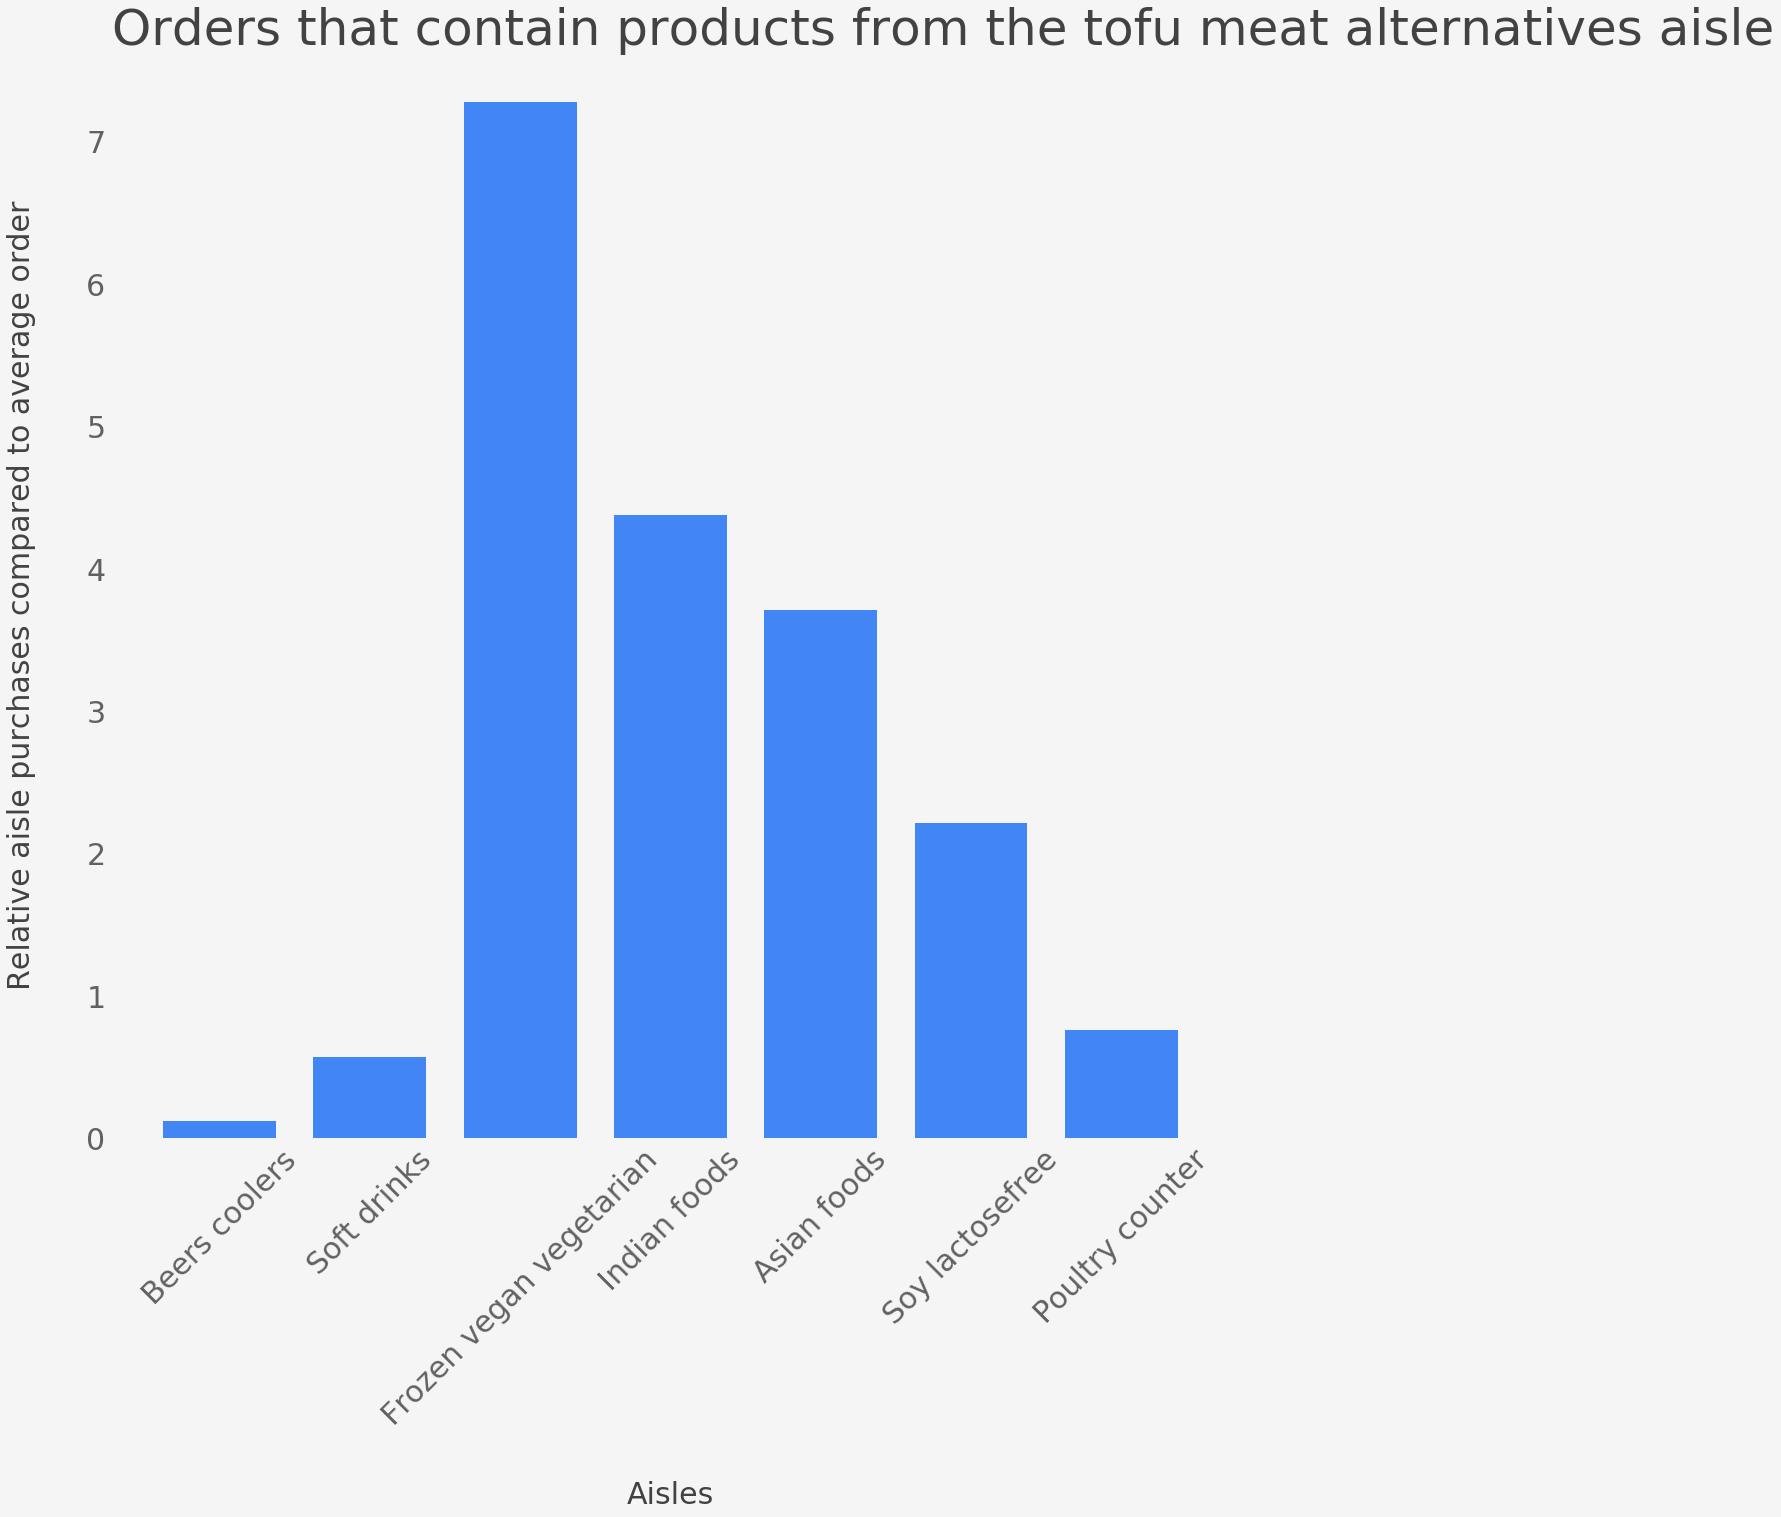

In [29]:
plot_comparison('Orders that contain products from the tofu meat alternatives aisle', tofu_aisles, tofu_compare)